## Stage 1: Business Understanding

This is about building a predictive model that can predict the positive or negative sentiment of customer feedback. 


















## Stage 2:  Data Understanding

Data Understanding which is about understanding the raw data use for building the model. In this case we have customer feedback record   data set having 3.4 million of records from Amazon. [the Amazon Product Review](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care.json.gz)



In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [81]:
# df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False, nrows=1000) # testing for purpose only
df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False)
pd.set_option('display.max_colwidth', -1)
df.head(2)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,159985130X,"[1, 1]",5.0,"This is a great little gadget to have around. We've already used it to look for splinters and a few other uses. The light is great. It's a handy size. However, I do wish I'd bought one with a little higher magnification.","01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600
1,1,159985130X,"[1, 1]",4.0,"I would recommend this for a travel magnifier for the occasional reading.I had read on another review about a magnifier having a problem with the light coming on. I did find that this one appeared to be DOA out of the box. But, after opening & shutting the viewer to turn on & off the light, the light began to come on. After several times of doing this, the light appears to be coming on all the time.It is small, but for taking it someplace & reading things like a menu in a dark corner of a restaurant, this is great.","02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200


## Stage 3: Data Preparation

All the ratings generally in the range of 1 to 5.

As this is a binary classification problem, we need to convert ratings to 1 or 0, 1 for positive and 0 for negative, hold the value in a derived column review_class for to train our model.



#### We need to convert ratings to 1 or 0, 1 for positive and 0 for negative, hold the value in a derived column review_class for to train our model.

In [82]:
df = df[['overall','reviewText']]
df['review_class'] = [1 if x > 3 else 0 for x in df.overall]

In [83]:
df1 = df[['reviewText','review_class']]

In [84]:
df1.set_index("reviewText", inplace=True)
df1.iloc[[8,16, 17, 20]]

,review_class
reviewText,
"The screen of the magnifier is small. If you're looking to read text this is not going to work. Though I have not attempted to replace the battery, battery container seems to be contained by a very small screw-A Phillips screwdriver-of which would have to be incredibly small. I dread having to replace his battery.",0
"This is a great little portable magnifier with light. I bought 2 of them so I could keep one in my purse and have one for my desk. However, my husband liked the blue one so much he took off with one and now I need to re-order!It is slightly curved so it feels good in your grip. Closed, it measures about as long as your standard full-sized desktop mouse and about a half inch thick. The viewing glass area is about as big as the face/screen of a flip style cell phone. When open it emits an impressively strong light that works like a champ in the darkest of rooms. As it is an LED light it should have a very long operating life as LEDs don't require a lot of power. Presumably the battery could be changed if needed as there is a small door with a single screw located behind where the light is housed. 5 stars!",1
"This magnifier has nothing to cover it when not in use.I compared it with a Carson 3x magnifier and this one did not seem as clear as the Carson - hard to see the furigana clearly in Japanese comic books with this one.The Carson ones come with a cover.I would recommend the Carson 5x if you are looking for good size enlarging.Carson MiniBrite 5x Power Slide- Out MagnifierI wish I had skipped the 3x and gone with the 5x only.For this one in the 3x, the light works well and lights things up nicely.Carson MiniBrite 5x Power Slide- Out Magnifier",0
"purchased this for someone who has macular degeneration and she actually cried when she used it because she had not been able to read a newspaper for a couple years. Although I also bought her a small hand-held magnifier, this covers a large area so you don't have to continually move the magnifier back and forth across the page.This allows it to be of use for reading large pages such as a newspaper or a full menu, for example.The fact that it is rigid allows it to be held more easily without it bending as some do which causes blurring and distortion of the page.",1


### Vectorization
In order for this data to make sense to our machine learning algorithm, we’ll need to convert each customer feedback review to a numeric representation. 

In classification of machine learning, items are represented by their features. In our case, customer feedback reviews are represented by their words, so we will use words as features.

#### Finding TFID

TF-IDF, which stands for term frequency — inverse document frequency, is a scoring measure widely used in information retrieval (IR) or summarization. TF-IDF is intended to reflect how relevant a term is in a given document.

#### Mathematical Calculation
#### Term Frequency
Term Frequency = (Number of occurrences of a word)/(Total words in the document)  
#### Inverse Document Frequency 
IDF(word) = Log((Total number of documents)/(Number of documents containing the word))  


Next steps, we need to divide our data into training and testing sets , 70% data is training and 30% is testing


In [85]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.review_class, test_size=0.3, random_state=0)
 
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')


# Convert a collection of raw documents to a matrix
# vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8', sublinear_tf=True, max_features=10000, ngram_range=(1,3))
# Learn vocabulary and idf from training set.
vectorizer.fit(x_train.values.astype('U'))
# Learn vocabulary and idf, return term-document matrix. 
# Uses the vocabulary and document frequencies (df) learned by fit.
x_train_tv = vectorizer.transform(x_train.values.astype('U'))
x_test_tv = vectorizer.transform(x_test.values.astype('U'))

x_train shape: (242448,)
y_train shape: (242448,)

x_test shape: (103907,)
y_test shape: (103907,)



The most interesting parameter here is ngram_range - we're telling it to generate 2 and 3 word phrases along with the single words from the corpus.

e.g. if we had the sentence "Python is cool" we'd end up with 6 phrases - 'Python', 'is', 'cool', 'Python is', 'Python is cool' and 'is cool'.

## Stage 4: Modeling

### Building Classifier : Linear Regression with Scikit-Learn

Now that we’ve transformed our dataset into a format suitable for modeling we can start building a classifier.
Logistic Regression is a good baseline model for us to use for several reasons: 
* They’re easy to interpret,
* linear models tend to perform well on sparse datasets 
* learn very fast compared to other algorithms.

### Training & Testing
We should train a model using the 70% training set and evaluate our accuracy on the records set

In [86]:
# training algorithm 
model = LogisticRegression()
# Fit the model according to the given training data.
# Training vector, where n_samples is the number of samples and n_features is the number of features.
model.fit(x_train_tv,y_train)
# Predict class labels for samples in X.
y_predict = model.predict(x_test_tv)

## Stage 5 : Evaluation

Evaluating machine learning algorithm is an essential part. 

This visual called The ROC curve is measure the true positive rate against the false positive rate at 
various threshold, and Area Under Curve, it is use for binary classification problem



AUC 0.9222848057167831
Score 0.8900362824448786


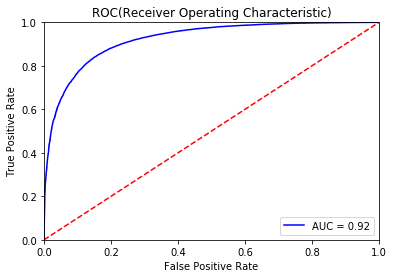

In [87]:
# Accuracy classification score
cv_score = accuracy_score(y_test,y_predict)
# predict probabilities
probs = model.predict_proba(x_test_tv)
probas = probs[:,1]
# AUC report
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probas)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC', roc_auc)
print('Score', cv_score)

plt.title('ROC(Receiver Operating Characteristic)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Accuracy

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

**Accuracy = No.of correct predictions / Total no.of predictions made**

Mathematically,  accuracy = (tp + tn) / (tp + tn + fp + fn)

* True Positives(tp) : The cases in which we predicted YES and the actual output was also YES.
* True Negatives(tn) : The cases in which we predicted NO and the actual output was YES.
* False Positives(fp) : The cases in which we predicted YES and the actual output was NO.
* False Negatives(fn) : The cases in which we predicted NO and the actual output was also NO.

Accuracy score: 0.8900362824448786


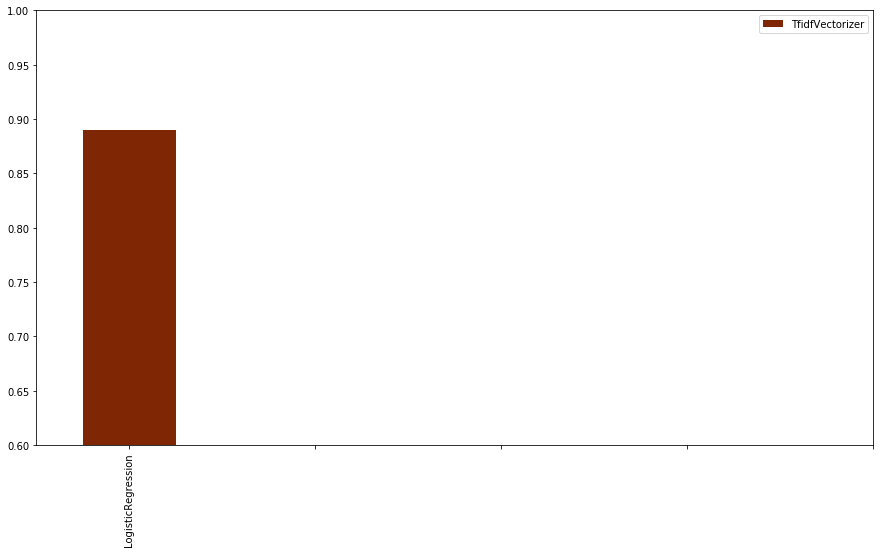

In [88]:
# Plotting the graph
results = {'Model':['LogisticRegression'],
           'TfidfVectorizer':[cv_score]
         }
 
    
results_df = pd.DataFrame(results)
results_df.plot.bar(ylim=(0.60,1.0), figsize=(15,8), align='center', colormap="Oranges_r")
plt.xticks(np.arange(5), results_df.Model)

# printing the out of the score
print('Accuracy score:', cv_score) 

### Reporting

#### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier")
with two rows and two columns that report the number of **false positive** and **false negative**

Each row of the Matrix represents the instances in a predicted class while each column represents the instances in an actual class

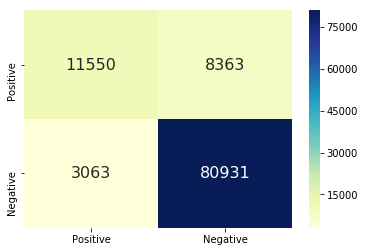

In [89]:
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, ['Positive', 'Negative'], ['Positive', 'Negative'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap="YlGnBu")

#### Classification Report

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

              precision    recall  f1-score   support

          0       0.79      0.58      0.67     19913
          1       0.91      0.96      0.93     83994

avg / total       0.88      0.89      0.88    103907



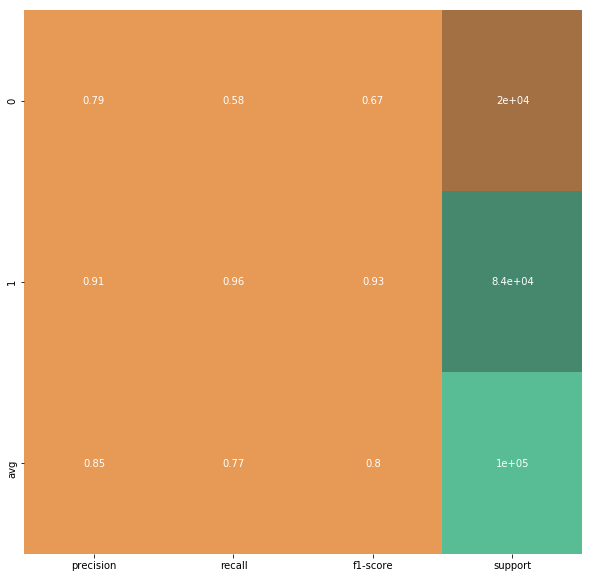

In [43]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
               cmap=sns.diverging_palette(760, 153, l=70, n=7, center="dark"))
    
print('', classification_report(y_test, y_predict))
plot_classification_report(y_test, y_predict)


### Unit Testing
Unit Testing is a good approach to test your model, the data we have prepared for our unit testing, where our model has not shown these data before. I have taken 100 records to unit test our model.

In [44]:
# read text data from file
df = pd.read_csv("test-data-filtered.csv")
df.tail(2)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
98,98,2982324,B00LWTTO0A,"[0, 0]",5.0,"Good quality clay, saves me salon visits to treat my skin!Just need a little bit of patience, but I like the product, will reorder.","07 18, 2014",A215W0EOUNL81C,Tina S.,Good quality clay,1405641600
99,99,2982325,B00LYPUPZK,"[0, 0]",1.0,Fake!,"07 21, 2014",A2ZFFXGLJUHD76,Dan Bernstein,One Star,1405900800


## Stage 6: Deployment
The last process of the entire framework is the deployment. 
We have trained our model and achieved very good accuracy score ~89% which is quite number.

In [154]:
joblib.dump(vectorizer, 'classical-vectorizer.joblib') 
joblib.dump(model,'classical-model.joblib')

['classical-model-nongram.joblib']

In [22]:
newVector = joblib.load('classfical-vectorizer.joblib') 
newModel = joblib.load('classical-model.joblib') 


array([1], dtype=int64)

In [28]:
# transformed 
mytext = 'Worst product I have seen ever'
myVectortest = newVector.transform([mytext])
joblibPrectict = newModel.predict(myVectortest)

for index, feedback in enumerate(joblibPrectict):
    if(feedback == 1):
        print("Your feedback is Positive")
    else:
        print("Your feedback is Negative")

Your feedback is Negative
